In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

#the above imports the plotting library matplotlib

In [2]:
#other useful imports we've seen before

import h5py
import numpy as np
import math

## Finding some interesting neurons 

In [3]:
#ok let's load the data 
DATA_PATH = "/home/chengxuz/Class/psych253_2018/data/ventral_neural_data.hdf5"
Ventral_Dataset = h5py.File(DATA_PATH)

In [4]:
#useful utility function for plotting HDF5 dimension labels
def dimnames(dataset):
    dims = dataset.dims  #get the dimension object
    dimlist = [x.label for x in dims.keys()]  #get the label attribute
    dimlist = map(str, dimlist)  #cast everything to string instead of "unicode" ... complicated rathole ... not strictly necessary
    return dimlist

In [5]:
#let's get the IT neural data -- time and trial averaged
Neural_Data = Ventral_Dataset['time_averaged_trial_averaged']
IT_NEURONS = Ventral_Dataset['neural_meta']['IT_NEURONS']
IT_Neural_Data = Neural_Data[:, IT_NEURONS]

#... and remind ourselves of the tensor shape
print('Shape:', IT_Neural_Data.shape)
print('Dimensions:', dimnames(Neural_Data))
#right, 5760 images and 168 neurons

('Shape:', (5760, 168))
('Dimensions:', ['image', 'neuron'])


In [6]:
#ok just like last time it was useful to sort by category 
#so this code is a copy from last time
categories = Ventral_Dataset['image_meta']['category'][:]   #array of category labels for all images  --> shape == (5760,)
unique_categories = np.unique(categories)                #array of unique category labels --> shape == (8,)
objects = Ventral_Dataset['image_meta']['object_name'][:]   #array of object labels for all images --> shape == (5670,)
unique_objects = np.unique(objects)                      #array of unique object labels --> shape == (64,) 
objects_by_category = {c: np.unique(objects[categories == c]) 
                       for c in unique_categories}
objects_sorted_by_categories = np.concatenate([objects_by_category[c] for c in unique_categories])


In [9]:
objects_sorted_by_categories

array(['ELEPHANT_M', 'GORILLA', 'LIONESS', 'TURTLE_L', 'bear', 'blCow',
       'breed_pug', 'hedgehog', 'BAHRAIN', 'CGTG_L', 'DTUG_L', 'MQUEEN_L',
       'SISTER_L', 'cruiser', 'motoryacht', 'support', 'Beetle', 'alfa155',
       'astra', 'bmw325', 'bora_a', 'celica', 'clio', 'z3', '_001', '_004',
       '_008', '_010', '_011', '_014', '_031', '_033', 'face0001',
       'face0002', 'face0003', 'face0004', 'face0005', 'face0006',
       'face0007', 'face0008', 'Apple_Fruit_obj', 'Apricot_obj',
       'Peach_obj', 'Pear_obj', 'Strawberry_obj', 'raspberry_obj',
       'walnut_obj', 'watermelon_obj', '_01_Airliner_2jetEngines',
       '_05_future', '_19_flyingBoat', 'f16', 'junkers88', 'mig29',
       'rdbarren', 'sopwith', '_08', '_10', '_11', '_12', '_18', '_37',
       '_38', '_44'],
      dtype='|S24')

In [90]:
#Now, we're interested in looking at some responses in closer detail
#let's plot some neuron's responses, averaged over all images of a given object
#on a per variation level basis
var_level = Ventral_Dataset['image_meta']['variation_level'][:]
unique_var_levels = np.unique(var_level)

sorted_IT_Neural_Data_means = np.array([IT_Neural_Data[(var_level == v) & (objects == o)].mean(0)
                                        for c in unique_categories
                                        for v in unique_var_levels 
                                        for o in objects_by_category[c]
                                        ])

In [87]:
sorted_IT_Neural_Data_means.shape

(192, 168)

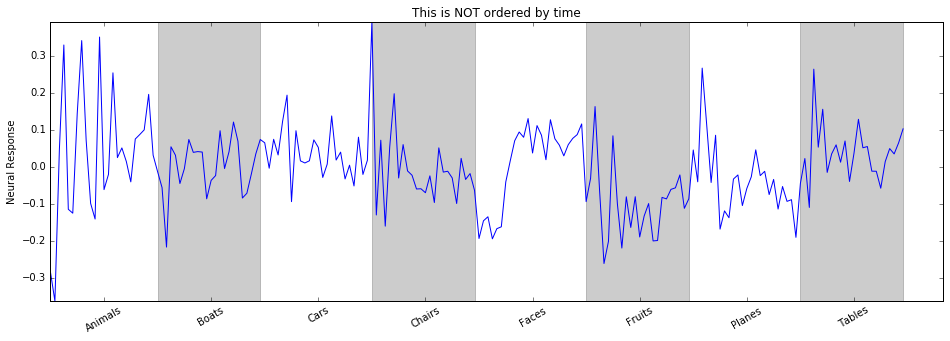

In [91]:
plt.figure(figsize=(16, 5))
neuron_ind = 0
neuron_i_data = sorted_IT_Neural_Data_means[:, neuron_ind]
minval = neuron_i_data.min()
maxval = neuron_i_data.max()
plt.plot(neuron_i_data)
plt.fill_between(np.arange(192), minval, maxval, 
                 where=(np.arange(192) / 24) % 2, color='k', alpha=0.2)
plt.xticks(np.arange(0, 192, 24) + 12, unique_categories, rotation=30);
plt.ylabel('Neural Response')
plt.ylim(minval, maxval)

#ok, well the 0th (first) neuron doesn't look that easy to interpret .... 
plt.title('This is NOT ordered by time')

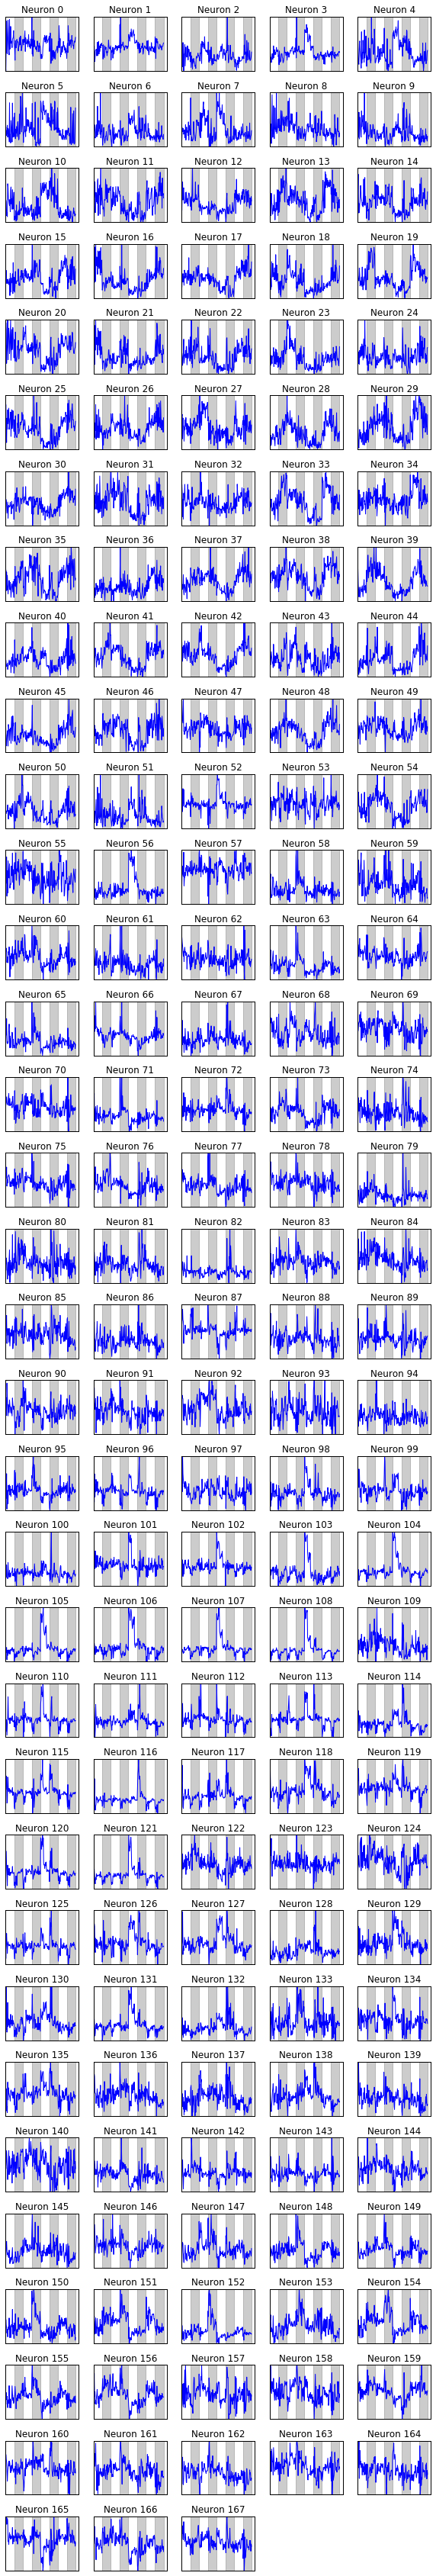

In [92]:
#but wait, let's plot *all* the IT neurons responses
plt.figure(figsize=(10, 60))
for neuron_ind in range(168):
    plt.subplot(34, 5, neuron_ind + 1)
    neuron_i_data = sorted_IT_Neural_Data_means[:, neuron_ind]
    minval = neuron_i_data.min()
    maxval = neuron_i_data.max()
    plt.plot(neuron_i_data)
    plt.fill_between(np.arange(192), minval, maxval, 
                     where=(np.arange(192) / 24) % 2, color='k', alpha=0.2)
    plt.xticks([]); plt.yticks([])
    plt.title('Neuron %d' % neuron_ind)
    plt.ylim(minval, maxval)
plt.subplots_adjust(hspace=0.4)

#hey what's going on with neurons 101-108 --- the seem to really like Faces!

(-0.27882752, 0.91493052)

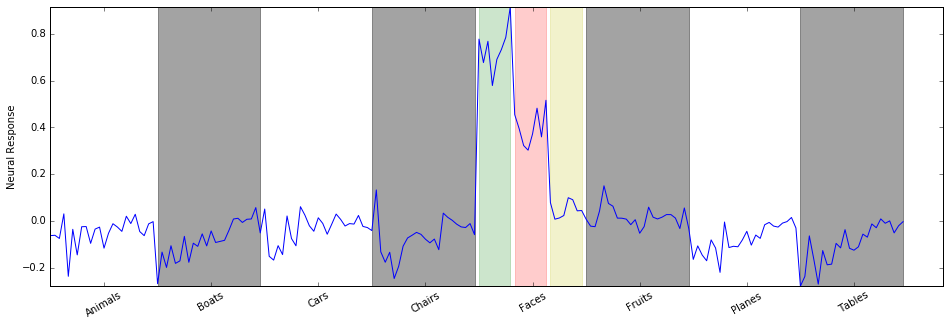

In [98]:
#let's look at one of these more closely.

neuron_ind = 105
plt.figure(figsize=(16, 5))
neuron_i_data = sorted_IT_Neural_Data_means[:, neuron_ind]
minval = neuron_i_data.min()
maxval = neuron_i_data.max()
plt.plot(neuron_i_data)
plt.fill_between(np.arange(192), minval, maxval, 
                 where=(np.arange(192) / 24) % 2, color='k', alpha=0.2)
plt.fill_between(np.arange(192), minval, maxval, 
                 where=(np.arange(192) / 24) % 2, color='k', alpha=0.2)
plt.fill_between(np.arange(192), minval, maxval, 
                 where=(np.arange(192) >= 4 * 24) & (np.arange(192) < 4 * 24 + 8), color='g', alpha=0.2)
plt.fill_between(np.arange(192), minval, maxval, 
                 where=(np.arange(192) >= 4 * 24 + 8) & (np.arange(192) < 4 * 24 + 16), color='r', alpha=0.2)
plt.fill_between(np.arange(192), minval, maxval, 
                 where=(np.arange(192) >= 4 * 24 + 16) & (np.arange(192) < 5 * 24), color='y', alpha=0.2)
plt.xticks(np.arange(0, 192, 24) + 12, unique_categories, rotation=30);
plt.ylabel('Neural Response')
plt.ylim(minval, maxval)

#remember -- sorted by category and then by variation level 
#there are 8 objects per category and 3 variation levels
#so that means each category block below has 24 points
#so we're seeing the neuron respond well to faces at low & medium variation 
#(the first (in green) and second (in red) miniblocks of eight points within the 5th block of 24) 
#but it is much less responsive to high variation faces (the third miniblock of 8 in yellow)

## Pairwise Reliability Analysis

In [99]:
#Let's look at the data 
by_trial_IT_Neural_Data_objmeans_sorted_by_category = {}
for vl in unique_var_levels:
    level_number = vl[-1]
    arr = Ventral_Dataset['time_averaged']['variation_level_%s' % level_number][:, :, IT_NEURONS]
    objects_at_var_level = objects[var_level == vl]
    arr1 = np.array([arr[:, objects_at_var_level == o].mean(1) for o in objects_sorted_by_categories])
    by_trial_IT_Neural_Data_objmeans_sorted_by_category[vl] = arr1


In [100]:
#so for each variation level, this dictionary has stuff of shape 
#(num_objects, num_trials_at_this_variation_level, num_IT_neurons)
by_trial_IT_Neural_Data_objmeans_sorted_by_category['V0'].shape

(64, 28, 168)

In [101]:
by_trial_IT_Neural_Data_objmeans_sorted_by_category['V3'].shape

(64, 51, 168)

In [102]:
def plot_various_trial_analyses(neuron_ind, var_level):
    plt.figure(figsize=(16, 5))
    
    #the first thing we want to do is just plot the data average
    #so first get the data for all trials
    neuron_i_data_by_trial = by_trial_IT_Neural_Data_objmeans_sorted_by_category[var_level][:, :, neuron_ind]
    #now take the mean over the second dimension -- the trial dimension
    neuron_i_data_trial_mean = neuron_i_data_by_trial.mean(1)
    #for convenience, let's compute the min and max values of the neural response
    minval = neuron_i_data_trial_mean.min()
    maxval = neuron_i_data_trial_mean.max()
    #now let's plot the responses across objects
    plt.plot(neuron_i_data_trial_mean)
    #and block stuff to make the categories easier to see
    plt.fill_between(np.arange(64), minval, maxval, 
                     where=(np.arange(64) / 8) % 2, color='k', alpha=0.2)
    plt.xticks(np.arange(0, 64, 8) + 4, unique_categories, rotation=30);
    plt.ylabel('Neural Response of neuron %d' % neuron_ind)
    plt.ylim(minval, maxval)
    plt.xlabel('Responses for Variation %s images' % var_level)

    #now let's look at two trials -- the first and 6th ones, for example 
    t1 = 0; t2 = 5
    t1_data = neuron_i_data_by_trial[:, t1]
    t2_data = neuron_i_data_by_trial[:, t2]
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(t1_data)
    plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);
    plt.title('Neuron %d, trial %d, var %s' % (neuron_ind, t1, var_level))
    plt.subplot(1, 2, 2)
    plt.plot(t2_data)
    plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);
    plt.title('Neuron %d, trial %d, var %s' % (neuron_ind, t2, var_level))

    #let's do a scatter plot of the responses to one trial vs the other
    plt.figure()
    plt.scatter(t1_data, t2_data)
    plt.xlabel('responses of neuron %d, trial %d, %s'% (neuron_ind, t1, var_level))
    plt.ylabel('responses of neuron %d, trial %d, %s'% (neuron_ind, t2, var_level))

    #how correlated are they exactly between trials? let's use pearson correlation
    #from the scipy.stats package (lots of other stats coded there too)
    import scipy.stats as stats
    rval = stats.pearsonr(t1_data, t2_data)[0]
    plt.title('Correlation for varlevel %s images = %.3f' % (var_level, rval))

    #in fact, let's have a look at the correlation for all pairs of trials 
    fig = plt.figure(figsize = (7, 7))
    #the numpy corrcoef function basically gets the pairwise pearson correlation efficiently
    corrs = np.corrcoef(neuron_i_data_by_trial.T)
    #now let's plot the matrix of correlations using the matshow function
    plt.colorbar(fig.gca().matshow(corrs))
    plt.xlabel('trials of neuron %d' % neuron_ind)
    plt.ylabel('trials of neuron %d' % neuron_ind)
    plt.title('Between-trial correlations for varlevel %s' % var_level)


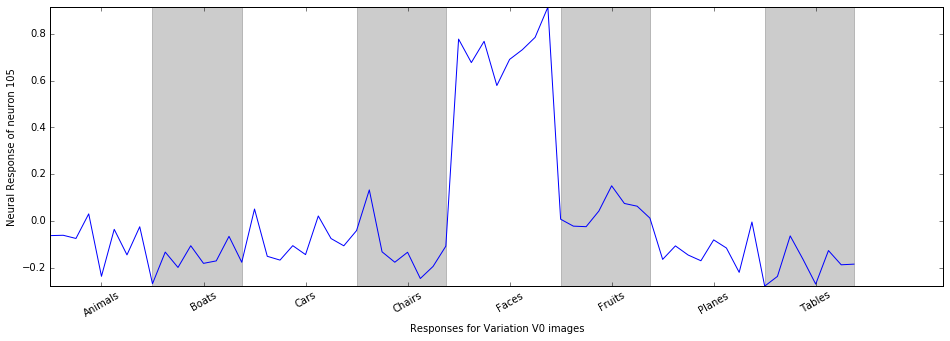

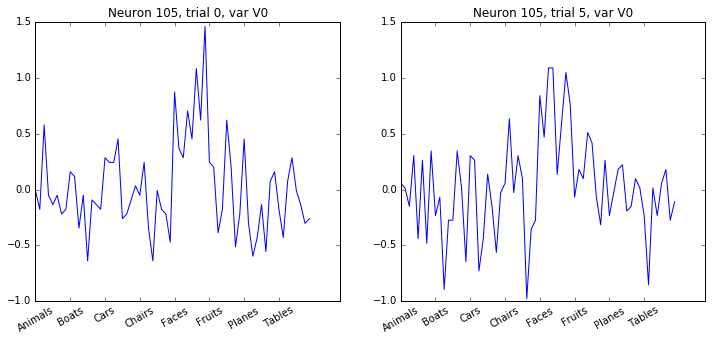

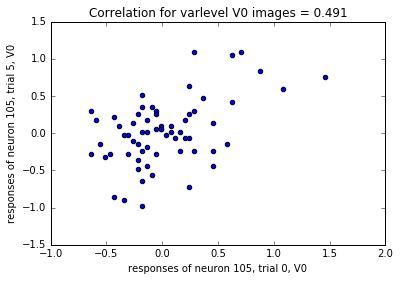

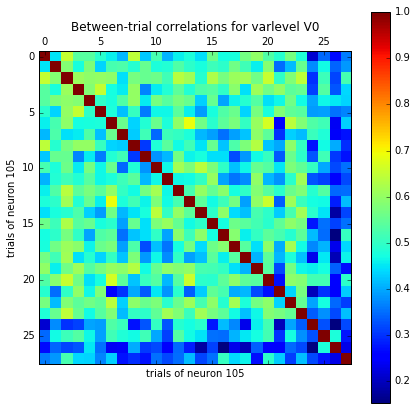

In [104]:
#ok let's use our analysis tool for Variation 0 images of neuron 105
plot_various_trial_analyses(105, 'V0')
#basically we find that the neuron definitely likes faces and is pretty correlated between trials  
#at this variation level

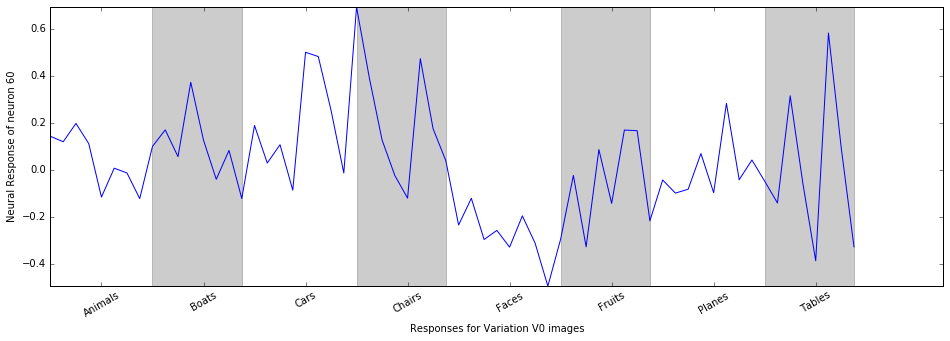

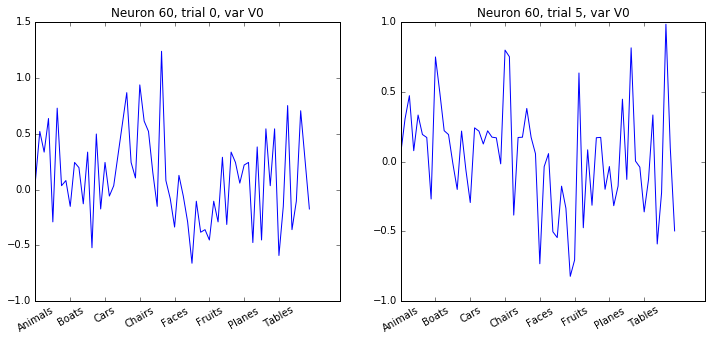

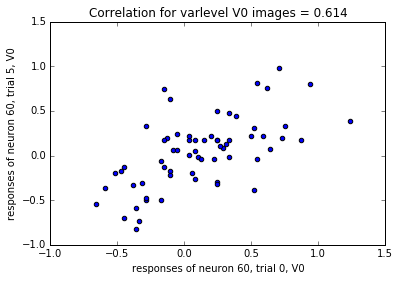

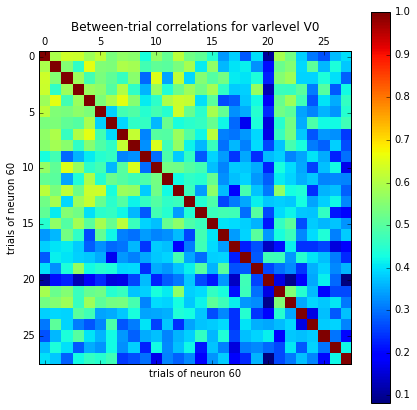

In [105]:
#neuron 60 has a more complex pattern -- maybe it's sorta anti-faces
plot_various_trial_analyses(60, 'V0')
#but also quite self-consistent between trials

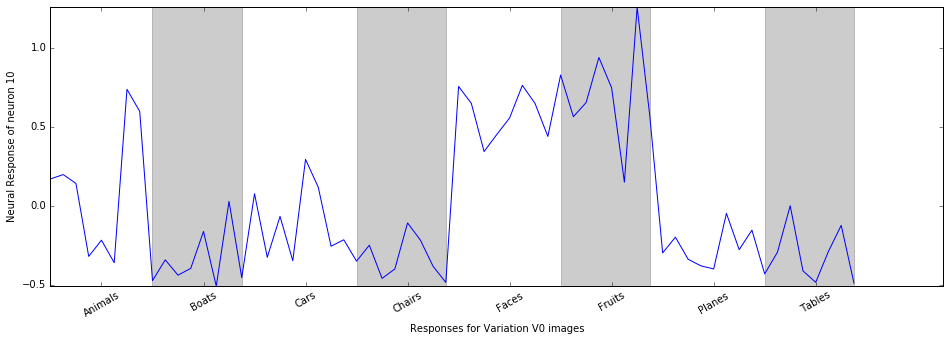

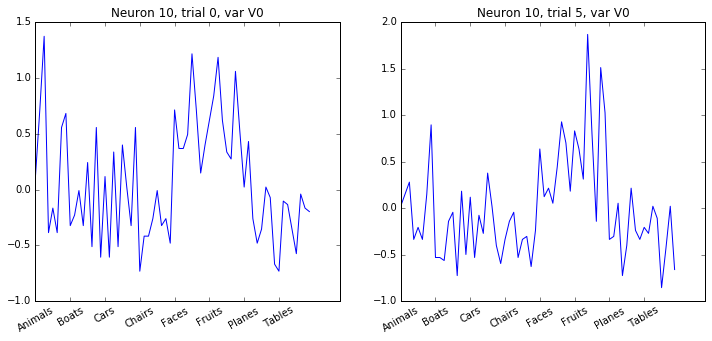

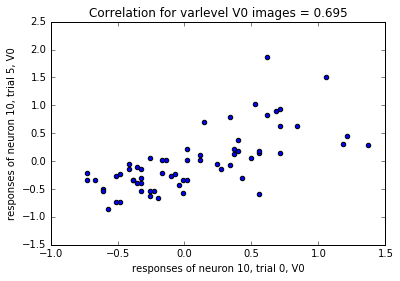

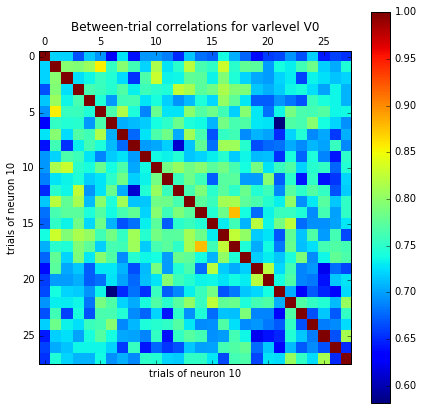

In [106]:
#perhaps neuron 10 is a "round thing" detector?  
plot_various_trial_analyses(10, 'V0')

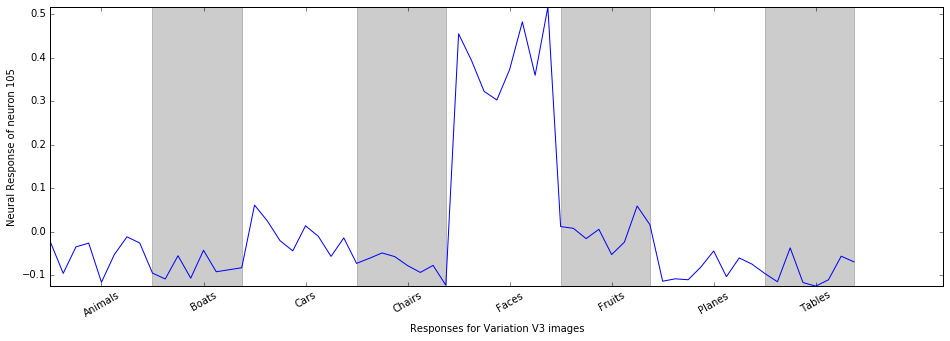

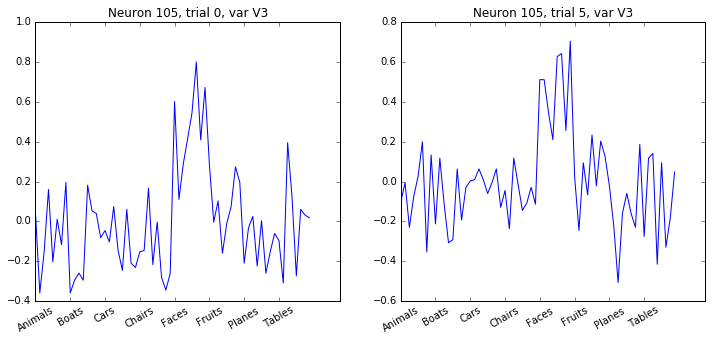

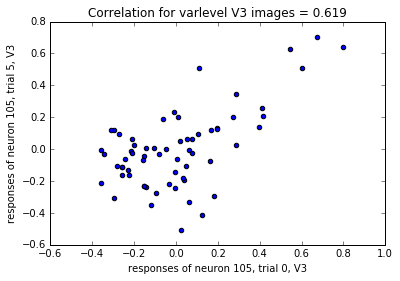

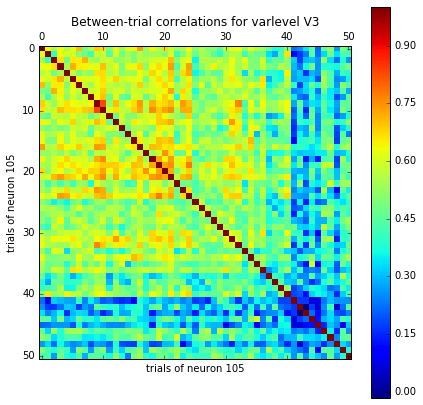

In [29]:
#neuron 105 is still pretty consistently face-liking at medium variation
plot_various_trial_analyses(105, 'V3')

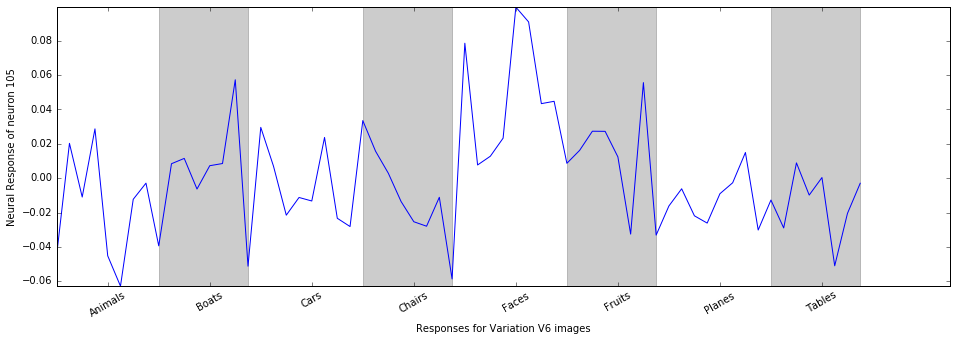

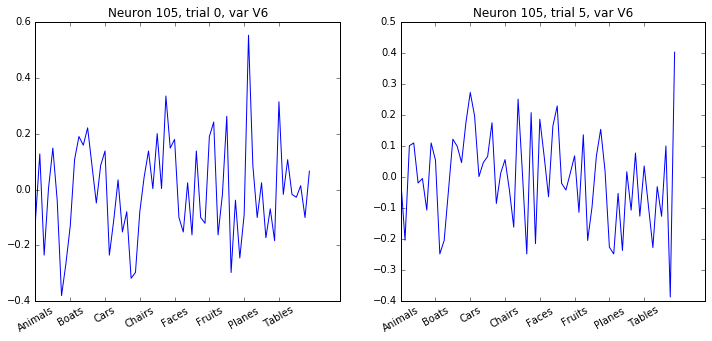

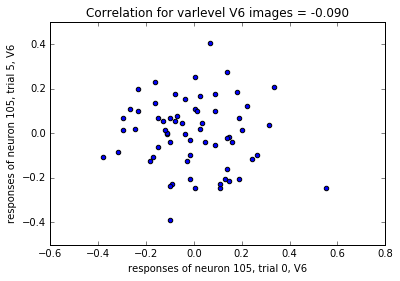

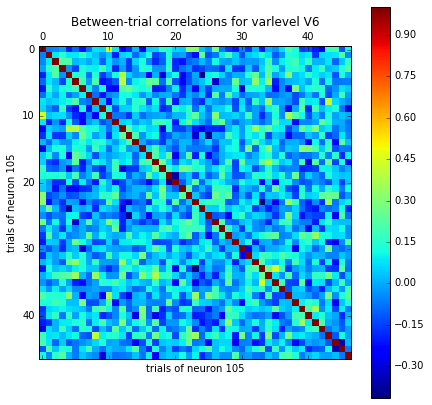

In [30]:
#but things get much murkier at high variation 
plot_various_trial_analyses(105, 'V6')

In [31]:
#this makes us curious to look at standard deviations of responses across trials
def plot_trial_avg_data_with_stds(neuron_ind, var_level):
    
    neuron_i_data_by_trial = by_trial_IT_Neural_Data_objmeans_sorted_by_category[var_level][:, :, neuron_ind]
    neuron_i_data_trial_mean = neuron_i_data_by_trial.mean(1)
    neuron_i_data_trial_std = neuron_i_data_by_trial.std(1)
    minval = neuron_i_data_trial_mean.min()
    maxval = neuron_i_data_trial_mean.max()
    plt.plot(neuron_i_data_trial_mean)
    plt.fill_between(np.arange(64), minval, maxval, 
                     where=(np.arange(64) / 8) % 2, color='k', alpha=0.2)

    plt.fill_between(np.arange(64), 
                     neuron_i_data_trial_mean - neuron_i_data_trial_std,
                     neuron_i_data_trial_mean + neuron_i_data_trial_std,
                     color='b', alpha=0.2)

    plt.xticks(np.arange(0, 64, 8) + 4, unique_categories, rotation=30);
    plt.ylabel('Neural Responses')
    plt.ylim(minval, maxval)
    plt.title('Responses for neuron %d Variation %s images' % (neuron_ind, var_level))
    plt.xlim(0, 64)

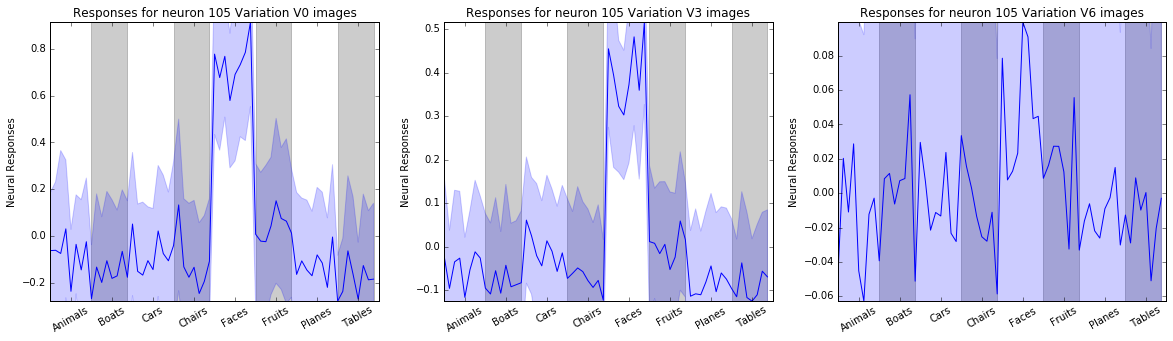

In [109]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_trial_avg_data_with_stds(105, 'V0')
plt.subplot(1, 3, 2)
plot_trial_avg_data_with_stds(105, 'V3')
plt.subplot(1, 3, 3)
plot_trial_avg_data_with_stds(105, 'V6')

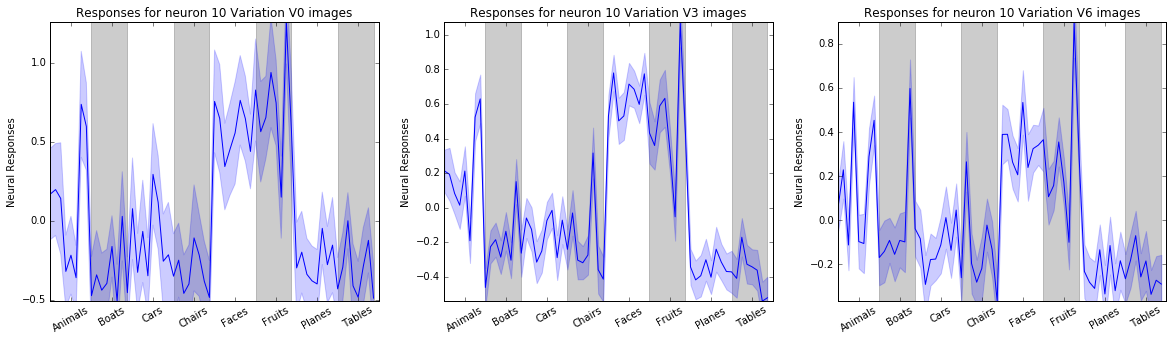

In [110]:
#Unlike our putative face neuron, this "round thing" detector is pretty consistent at high variability
#which is reasonable semantically -- round things are still round from many object angles
#but faces are really hard to recognize from extremely weird angles as seen in the high variation condition
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_trial_avg_data_with_stds(10, 'V0')
plt.subplot(1, 3, 2)
plot_trial_avg_data_with_stds(10, 'V3')
plt.subplot(1, 3, 3)
plot_trial_avg_data_with_stds(10, 'V6')

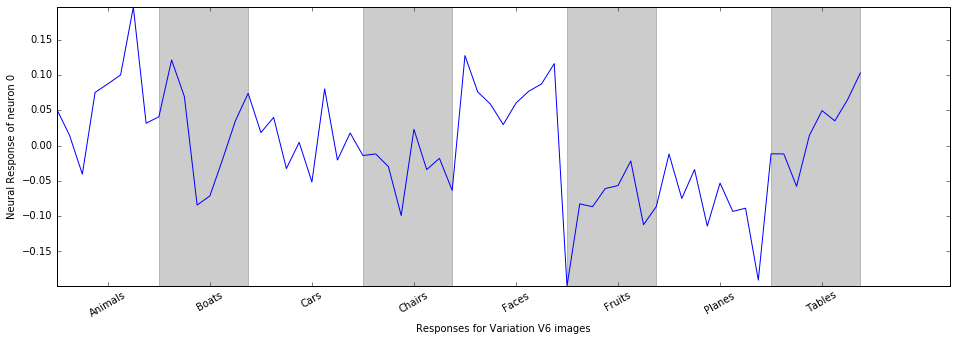

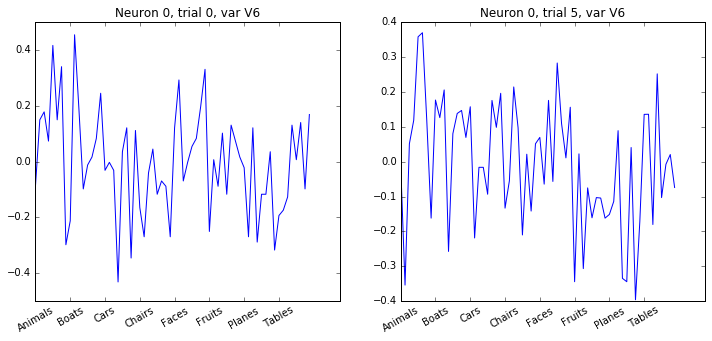

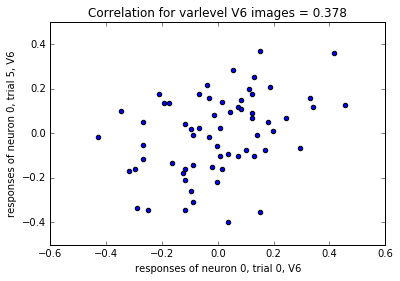

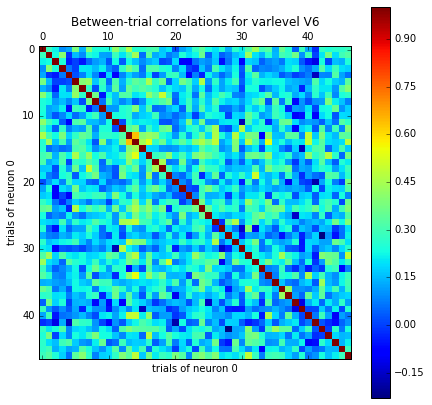

In [34]:
#neuron 0 seems to sort of be in an intermediate situation 
#-- somewhat but not incredibly reliable responses at high variation
plot_various_trial_analyses(0, 'V6')

## Split-Half Reliability

In [36]:
import scipy.stats as stats

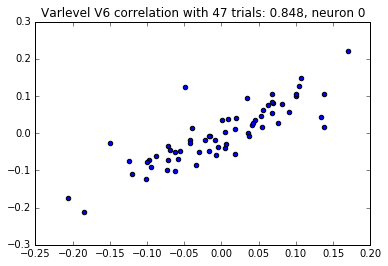

In [37]:
#but wait -- we've only really been looking at *pairs* of trials
#do we can more reliable results if we average over groups of trials?

neuron_ind = 0
vl = 'V6'
#let's measure the number of trials
num_trials = by_trial_IT_Neural_Data_objmeans_sorted_by_category[vl].shape[1]

#then compute the average of the neuron's responses in the first and second half of trials
first_half_trial_mean = by_trial_IT_Neural_Data_objmeans_sorted_by_category[vl][:, :num_trials/2, neuron_ind].mean(1)
second_half_trial_mean = by_trial_IT_Neural_Data_objmeans_sorted_by_category[vl][:, num_trials/2:, neuron_ind].mean(1)

#plot the first and second half vs each other
plt.scatter(first_half_trial_mean, second_half_trial_mean)

#.... and measure and report their correlation
corrval = stats.pearsonr(first_half_trial_mean, second_half_trial_mean)[0]
plt.title('Varlevel %s correlation with %d trials: %.3f, neuron %d' % (vl, num_trials, corrval, neuron_ind))

#much higher here with more trials

In [40]:
#here's a very simple implementation of split-half reliability
#this is a NON-boostrapping version

def get_correlation(data_by_trial, num_trials, num_splits):
    """arguments:
          data_by_trial -- (numpy array) the data
             assumes a tensor with structure is (stimuli, trials)
             
          num_trials -- (nonnegative integer) how many trials to consider
          
          num_splits (nonnegative integer) how many splits of the data to make
          
       returns:
          array of length num_splits
    """

    
    #get total number of trials
    num_total_trials = data_by_trial.shape[1]
    
    #you better not ask for more trials than you actually have
    assert num_trials <= num_total_trials, "You asked for %d trials but there's only %d" % (num_trials, num_total_trials)
    
    #we want to make sure that while we select groups of trials basically randomly,
    #that we can still exactly reproduce our results later
    #so to do this, we use a constructed random number generator to select trial groups
    #and seed the generator with seed = 0 (could be any non-negative integer, but the seed
    #*must* be set for this to be reproducible
    random_number_generator = np.random.RandomState(seed=0)

    corrvals = []
    for split_index in range(num_splits):
        #construct a new permutation of the trial indices
        perm =  random_number_generator.permutation(num_total_trials)
    
        #take the first num_trials/2 and second num_trials/2 pieces of the data
        first_half_of_trial_indices = perm[:num_trials / 2]
        second_half_of_trial_indices = perm[num_trials / 2: num_trials]
        
        #mean over trial dimension
        mean_first_half_of_trials = data_by_trial[:, first_half_of_trial_indices].mean(axis=1)
        mean_second_half_of_trials = data_by_trial[:, second_half_of_trial_indices].mean(axis=1)
        
        #compute the correlation between the means
        corrval = stats.pearsonr(mean_first_half_of_trials, 
                                 mean_second_half_of_trials)[0]
        #add to the list
        corrvals.append(corrval)
        
    return np.array(corrvals)

In [41]:
#to test our get_correlation function we want to work with the full IT
#not just the data averaged across all images within each object 
#so let's get a convenient data object for that

IT_Data_by_trial = {}
for vl in unique_var_levels:
    level_number = vl[-1]
    arr = Ventral_Dataset['time_averaged']['variation_level_%s' % level_number][:, :, IT_NEURONS]
    IT_Data_by_trial[vl] = arr.swapaxes(0, 1)

In [42]:
#ok so first we want to know, for a given number of trials, how many splits do we need to compute to
#get a reliable estimate of the mean tendency of the correlation with that many splits? 
#let's first look at 2 splits 

neuron_ind = 0
vl = 'V6'

num_trials = 10
num_splits = 2

corrvals = get_correlation(IT_Data_by_trial[vl][:, :, neuron_ind], 
                           num_trials, 
                           num_splits)

print(corrvals)
print('mean --> %.3f' % corrvals.mean())
print('standard error of mean --> %.3f' % (corrvals.std() / np.sqrt(num_splits)))

[ 0.26888576  0.26218286]
mean --> 0.266
standard error of mean --> 0.002


In [43]:
#... and now at 500 splits
neuron_ind = 0
vl = 'V6'

num_trials = 10
num_splits = 500

corrvals = get_correlation(IT_Data_by_trial[vl][:, :, neuron_ind], 
                           num_trials, 
                           num_splits)

print('mean --> %.3f' % corrvals.mean())
print('standard error of mean --> %.3f' % (corrvals.std() / np.sqrt(num_splits)))

mean --> 0.268
standard error of mean --> 0.001


(-1, 513)

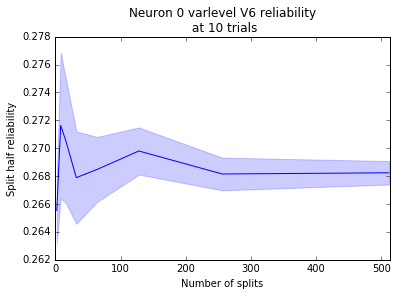

In [114]:
#in fact, let's plot reliability estimate and the SEM as a function of the number of splits
#... first for 10 trials

neuron_ind = 0
vl = 'V6'

num_trials = 10

means = []
sems = []

num_splits = [2, 8, 16, 32, 64, 128, 256, 512]
for ns in num_splits:
    cs = get_correlation(IT_Data_by_trial[vl][:, :, neuron_ind],
                           num_trials, 
                           ns)
    mean = cs.mean()
    means.append(mean)
    sem = cs.std() / np.sqrt(ns)
    sems.append(sem)
    
means = np.array(means)
sems = np.array(sems)

plt.plot(num_splits, means)
plt.fill_between(num_splits, means - sems, means + sems, color='b', alpha = 0.2)
plt.xlabel('Number of splits')
plt.ylabel('Split half reliability')
plt.title('Neuron %d varlevel %s reliability\n at 10 trials' % (neuron_ind, vl))
plt.xlim(-1, 513)

(-1, 513)

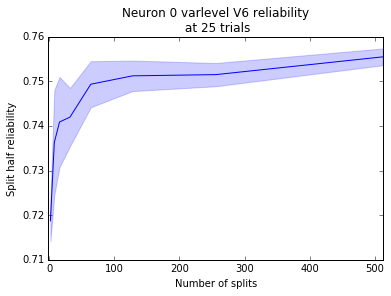

In [117]:
#... now for 25 trials
neuron_ind = 0
vl = 'V6'

num_trials = 25

means = []
sems = []

num_splits = [2, 8, 16, 32, 64, 128, 256, 512]
for ns in num_splits:
    cs = get_correlation(by_trial_IT_Neural_Data_objmeans_sorted_by_category[vl][:, :, neuron_ind], 
                           num_trials, 
                           ns)
    mean = cs.mean()
    means.append(mean)
    sem = cs.std() / np.sqrt(ns)
    sems.append(sem)
    
means = np.array(means)
sems = np.array(sems)

plt.plot(num_splits, means)
plt.fill_between(num_splits, means - sems, means + sems, color='b', alpha = 0.2)
plt.xlabel('Number of splits')
plt.ylabel('Split half reliability')
plt.title('Neuron %d varlevel %s reliability\n at %d trials' % (neuron_ind, vl, num_trials))
plt.xlim(-1, 513)

#conclusion:  it looks like having num_splits ~ 10 * num_trials is good enough

In [48]:
#ok so now let's look at reliability as a function of number of trials

def get_reliability_curve(data):
    """
    This is a convenience function that plots reliability as a function of number of trials for some data
    
    arguments:
       data -- (numpy array) of shape (stimuli, trials)
    
    """
    means = []
    sems = []

    #determine the total number of trials
    total_num_trials = data.shape[1]
    
    #we'll evaluate reliability for each number of trials betwee 2 and the total, 
    #in intervals of 3
    num_trials = range(2, total_num_trials, 3)
    for nt in num_trials:
        ns = 10 * nt
        cs = get_correlation(data,
                               nt, 
                               ns)
        mean = cs.mean()
        means.append(mean)
        sem = cs.std() / np.sqrt(ns)
        sems.append(sem)

    means = np.array(means)
    sems = np.array(sems)

    ln = plt.plot(num_trials, means)[0]  #this "ln" thing is a matplotlib thing -- usefor for making legens (see below)
    plt.fill_between(num_trials, means - sems, means + sems, color='b', alpha = 0.2)

    plt.xlabel('Number of Trials')
    plt.ylabel('Mean correlation')
    
    return ln

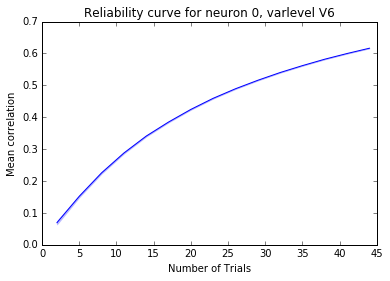

In [49]:
#so we see that, not unexpectedly, reliability increases at a function of number of trials

neuron_ind = 0
vl = 'V6'
get_reliability_curve(IT_Data_by_trial[vl][:, :, neuron_ind]);

plt.title('Reliability curve for neuron %d, varlevel %s' % (neuron_ind, vl))


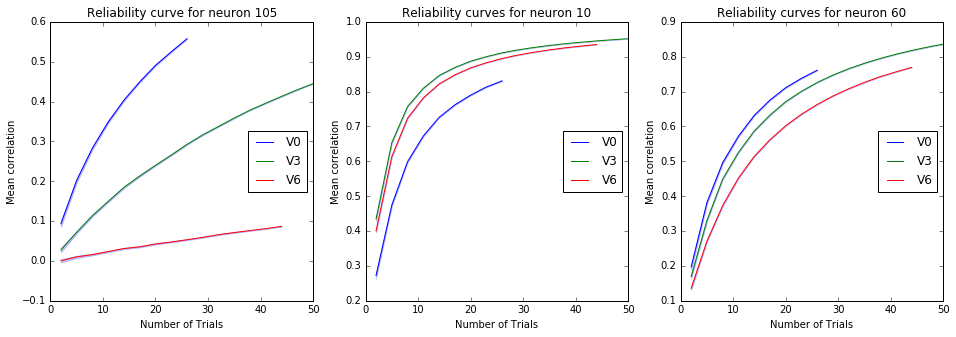

In [50]:
#but what is interesting is that reliability is different across different variation levels
#and the pattern between this is different for different neurons

plt.figure(figsize = (16, 5))

plt.subplot(1, 3, 1)
neuron_ind = 105

lns = []
for vl in unique_var_levels:
    ln = get_reliability_curve(IT_Data_by_trial[vl][:, :, neuron_ind])
    lns.append(ln)

plt.title('Reliability curve for neuron %d' % neuron_ind)
plt.legend(lns, unique_var_levels, loc='center right')

plt.subplot(1, 3, 2)
neuron_ind = 10
lns = []
for vl in unique_var_levels:
    ln = get_reliability_curve(IT_Data_by_trial[vl][:, :, neuron_ind])
    lns.append(ln)

plt.title('Reliability curves for neuron %d' % neuron_ind)
plt.legend(lns, unique_var_levels, loc='center right')


plt.subplot(1, 3, 3)
neuron_ind = 60
lns = []
for vl in unique_var_levels:
    ln = get_reliability_curve(IT_Data_by_trial[vl][:, :, neuron_ind])
    lns.append(ln)

plt.title('Reliability curves for neuron %d' % neuron_ind)
plt.legend(lns, unique_var_levels, loc='center right')

## Spearman-Brown Prophecy Formula

In [51]:
#put in sb correction comparing var levels 

In [52]:
def spearman_brown(uncorrected, multiple):
    numerator = multiple * uncorrected
    denominator = 1 + (multiple - 1) * uncorrected
    return numerator / denominator

In [53]:
#ok so now let's look at reliability as a function of number of trials

def get_reliability_curve_spearman_brown(data):
    """
    This is a convenience function that plots reliability as a function of number of trials for some data
    
    arguments:
       data -- (numpy array) of shape (stimuli, trials)
    
    """
    means = []
    sems = []
    corrected_means = []

    #determine the total number of trials
    total_num_trials = data.shape[1]
    
    #we'll evaluate reliability for each number of trials betwee 2 and the total, in intervals of 3
    num_trials = range(2, total_num_trials, 3)
    for nt in num_trials:
        ns = 10 * nt
        cs = get_correlation(data,
                               nt, 
                               ns)
        mean = cs.mean()
        means.append(mean)
        sem = cs.std() / np.sqrt(ns)
        sems.append(sem)
        
        multiple = total_num_trials / float(nt) #have to do "float" here since python 2.x does integer division
        corrected_mean = spearman_brown(mean, multiple) 
        corrected_means.append(corrected_mean)
        
    means = np.array(means)
    sems = np.array(sems)
    corrected_means = np.array(corrected_means)
    
    ln = plt.plot(num_trials, means)[0]  #this "ln" thing is a matplotlib thing -- usefor for making legens (see below)
    plt.fill_between(num_trials, means - sems, means + sems, color='b', alpha = 0.2)
    
    ln_cor = plt.plot(num_trials, corrected_means)[0]

    plt.xlabel('Number of Trials')
    plt.ylabel('Mean correlation')
    
    return ln, ln_cor

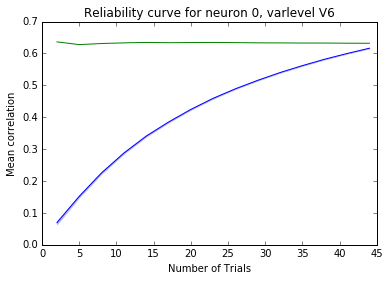

In [83]:
#ok the spearman-brown correction is a little bit of an overestimate here ...
#... but not bad
neuron_ind = 0
vl = 'V6'
get_reliability_curve_spearman_brown(IT_Data_by_trial[vl][:, :, neuron_ind]);

plt.title('Reliability curve for neuron %d, varlevel %s' % (neuron_ind, vl))



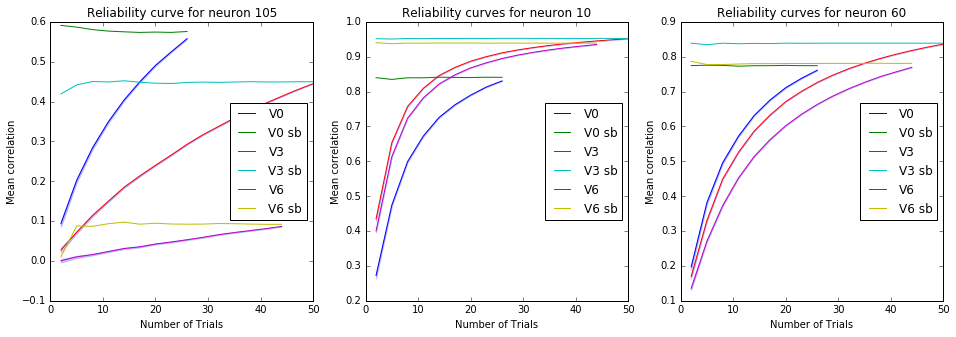

In [84]:
#in general the method works well  .... 

plt.figure(figsize = (16, 5))

plt.subplot(1, 3, 1)
neuron_ind = 105

lns = []
for vl in unique_var_levels:
    ln, ln_cor = get_reliability_curve_spearman_brown(IT_Data_by_trial[vl][:, :, neuron_ind])
    lns.extend([ln, ln_cor])

labels = ['V0', 'V0 sb', 'V3', 'V3 sb', 'V6', 'V6 sb']
plt.title('Reliability curve for neuron %d' % neuron_ind)
plt.legend(lns, labels, loc='center right')

plt.subplot(1, 3, 2)
neuron_ind = 10
lns = []
for vl in unique_var_levels:
    ln, ln_cor = get_reliability_curve_spearman_brown(IT_Data_by_trial[vl][:, :, neuron_ind])
    lns.extend([ln, ln_cor])

plt.title('Reliability curves for neuron %d' % neuron_ind)
plt.legend(lns, labels, loc='center right')


plt.subplot(1, 3, 3)
neuron_ind = 60
lns = []
for vl in unique_var_levels:
    ln, ln_cor = get_reliability_curve_spearman_brown(IT_Data_by_trial[vl][:, :, neuron_ind])
    lns.extend([ln, ln_cor])

plt.title('Reliability curves for neuron %d' % neuron_ind)
plt.legend(lns, labels, loc='center right')

## Bootstrapping

In [78]:
#we'll use this convenience function for computing pairwise distances 
from scipy.spatial.distance import pdist
#e.g. correlations = 1 - correlation_distance
#and correlation_distance(X) = pdist(X, metri='correlation')

def averager(data):
    return np.mean(data, axis=0)

def get_bootstrap_sample(datalist, seed, aggregation_func=averager, sync=False):
    """this function gets one bootstrap sample 
       datalist = list of arrays of form 
             [(stimuli_group0, trials), (stimuli_group1, trials), ..., ]
       seed = integer seed for random number generator
       aggregation_func = callable that aggregates trial samples to single synthetic trial 
                            default is to just average over samples
       sync = boolean; whether to take trials synchronously (all samples for different stimuli
              from trials in the same session);
    """
    #create the random number generator
    rng = np.random.RandomState(seed=seed)
    
    synth_datalist = []
    #for each stimulus group:
    for data in datalist:
        num_trials = data.shape[1]
        #reconstruct data using the bootstrap idea for this stimulus group
        if sync:
            #if using the same trials for all stimulu, just get
            #a selection of trial numbers 
            selection = rng.randint(0, num_trials, size=(num_trials,))
            synth_data = data[:, selection].T
        else:
            #if using different trials for all stimuli, loop over trials ...
            synth_data = []
            num_stim = data.shape[0]
            for _ind in range(num_trials):
                #... and choose a different selection for each one
                selection = rng.randint(0, num_trials, size=(num_stim,))
                synth_sample = data[np.arange(num_stim), selection]
                synth_data.append(synth_sample)
        synth_data_meaned = aggregation_func(synth_data) #<-- this ends up being just a 1-D vector
        synth_datalist.append(synth_data_meaned)
        
    #concatenate results into sample for all stimulus groups
    synth_data_final = np.concatenate(synth_datalist)
    return synth_data_final


def get_bootstrap_correlation(num_iters, datalist, metric='correlation', sync=False):
    """this function calls the bootstrapping sampler a given number of times with different seeds
       returning the flattened list of pairwise distances bewteen samples for indicated distance metric
       
       num_iters = integer of how many bootstrapping samples we end up taking (should be >= 100)
       datalist = list of data arrays of form 
             [(stimuli_group0, trials), (stimuli_group1, trials), ..., ]
       metric = string, whatever type of way you want to compare the samples -- 
                by default this is "correlation", but could be anything acceptable to 
                the scipy.spatial.distance.pdist function, as specified here:
                    http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
    """
    synth_datas = []
    for _ind in range(num_iters):
        synth_data = get_bootstrap_sample(datalist, seed=_ind, sync=sync)
        synth_datas.append(synth_data)
    synth_datas = np.array(synth_datas)
    corrs = pdist(synth_datas, metric=metric)
    return np.mean(corrs), np.std(corrs)

In [82]:
num_iters = 100
metric = 'correlation'

corrs = []

neuron_ind = 0
datalist = [IT_Data_by_trial[vl][:, :, neuron_ind] for vl in unique_var_levels]
distmean, distspread = get_bootstrap_correlation(num_iters, datalist, metric)
corrs.append(1 - distmean)

neuron_ind = 10
datalist = [IT_Data_by_trial[vl][:, :, neuron_ind] for vl in unique_var_levels]
distmean, distspread = get_bootstrap_correlation(num_iters, datalist, metric)
corrs.append(1 - distmean)

neuron_ind = 60
datalist = [IT_Data_by_trial[vl][:, :, neuron_ind] for vl in unique_var_levels]
distmean, distspread = get_bootstrap_correlation(num_iters, datalist, metric)
corrs.append(1 - distmean)

neuron_ind = 105
datalist = [IT_Data_by_trial[vl][:, :, neuron_ind] for vl in unique_var_levels]
distmean, distspread = get_bootstrap_correlation(num_iters, datalist, metric)
corrs.append(1 - distmean)

print(corrs)

[0.80392004411764106, 0.96922277317498418, 0.90576992192166295, 0.69045339212976287]
